In [202]:
import numpy as np
import pandas as pd

from scipy.linalg import svd
from scipy.sparse.linalg import svds
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
gte = pd.read_csv('GTExdata.csv', low_memory=False)
sampleLabels = pd.read_csv('SampleLabels.csv', low_memory=False)

In [205]:
gte.head()

,-0.81443,-0.1728,-0.13566,4.036,3.4742,0.017055,0.76495,3.0281,0.56595,1.9045,...,-0.88508,-2.2228,-3.0385,-2.8584,-3.4724,-2.5374,-2.9705,-1.8397,-2.1044,-1.9881
0,-1.219500,-0.139670,-0.217330,-1.4361,-0.86158,0.403280,-0.91309,6.9136,4.38540,6.15440,...,2.01310,1.25060,0.333560,0.37651,-0.086984,0.221580,1.205700,0.81913,0.20093,1.371100
1,-0.010044,-0.042155,0.111440,-1.0768,-0.72246,0.651900,-0.79763,5.6678,2.94680,4.63420,...,-1.07800,-0.52936,-0.989140,-3.10870,-3.262500,-1.159200,0.091823,-1.14740,-1.59540,-0.092996
2,-1.336400,-0.088622,-0.126460,-1.7866,-0.99562,0.009797,-1.05550,6.5985,4.22730,6.02260,...,0.67228,0.98691,0.142270,0.34028,-0.129170,0.064783,1.279200,1.05850,0.63342,1.581000
3,-1.055100,-0.065230,-0.087368,-1.4559,-0.69961,0.205960,-0.83905,6.1986,4.05600,5.78430,...,0.48401,0.63014,0.061371,-0.82861,-1.537200,-0.121850,0.735520,0.32366,-0.54558,0.789580
4,-0.538700,-0.184340,-0.266680,-1.8266,-0.79040,0.593780,-0.79899,-1.7453,-0.25312,-0.47961,...,-0.22813,1.03090,1.608100,1.59950,1.478600,2.137100,0.563560,0.11520,-0.21623,0.675090


In [206]:
sampleLabels.head()

,Sampleid,Tissue type specific,Tissue type
0,GTEX-N7MS-0007-SM-2D7W1,Whole Blood,Blood
1,GTEX-N7MS-0011-R10A-SM-2HMJK,Brain - Frontal Cortex (BA9),Brain
2,GTEX-N7MS-0011-R11A-SM-2HMJS,Brain - Cerebellar Hemisphere,Brain
3,GTEX-N7MS-0011-R1a-SM-2HMJG,Brain - Hippocampus,Brain
4,GTEX-N7MS-0011-R2a-SM-2HML6,Brain - Substantia nigra,Brain


## 1.Realizar una descomposición en valores singulares sobre el set 

In [207]:
## Uso la funcion svd de la librería scipy.linalg para calcular las matrices s,v,d del set
u,s,vt = svd(gte)


In [208]:
print("Los valores singulares de la matriz resultan:",'\n',s)
type(s)

Los valores singulares de la matriz resultan: 
 [2.52942267e+03 2.15350881e+03 1.85728127e+03 ... 9.47585838e+00
 9.39885946e+00 5.49027077e-01]


numpy.ndarray

##### A. Graficar la energía acumulada en función de la cantidad de autovalores, y graficar los autovalores del set

[6.39797906e+06 4.63760019e+06 3.44949373e+06 ... 8.97918920e+01
 8.83385591e+01 3.01430732e-01]


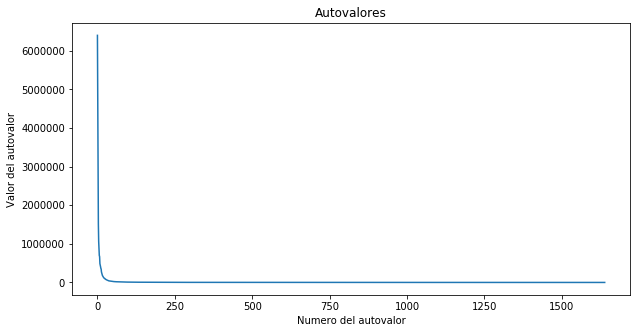

In [209]:
## Teniendo en cuenta que σ^2[i] correspone al autovalor λ[i] 
autovalores = s**2
print(autovalores)
plt.figure(figsize=[10,5])
plt.title("Autovalores")
plt.xlabel("Numero del autovalor")
plt.ylabel("Valor del autovalor")
plt.plot(autovalores)

In [210]:

energiaTotal = sum(autovalores)
print(energiaTotal)
Lacumulada = []
Eacumulada = 0
for av in autovalores:
    Eacumulada += (av/energiaTotal) *100
    Lacumulada.append(Eacumulada)

26841258.956559792


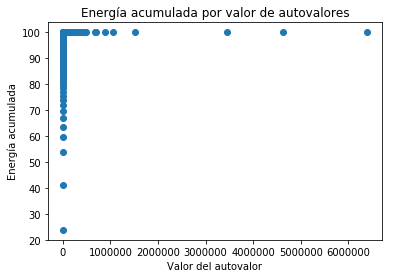

In [211]:
plt.ylabel('Energía acumulada')
plt.xlabel('Valor del autovalor')
plt.title('Energía acumulada por valor de autovalores')
plt.scatter(autovalores[::-1],Lacumulada)

Text(0.5,1,'Energía acumulada por cantidad de autovalores')

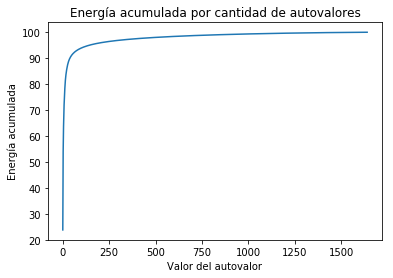

In [212]:
plt.plot(range(autovalores.size),Lacumulada)
plt.xlabel('Valor del autovalor')
plt.ylabel('Energía acumulada')
plt.title('Energía acumulada por cantidad de autovalores')

##### b. Con los dos gráficos anteriores, indicar qué valor de k se podría utilizar para realizar una aproximación. 

#### Aproximación de rango k:
Se puede pensar que como los valores de la matriz s estan ordenados de mayor a menor entonces estos valores representan un grado de importancia dentro de la matriz, por eso la idea de "Energía acumulada"
En el primer grafico se puede observar como los autovalores mayores acumulan mayor energia que los menores, aunque se dispara muy rapido el grafico.

Entonces podemos ver cuanto acumulan los primeros autovalores, que son los mayores y cuantos de ellos necesitamos para hacer una buena aproximacion

In [213]:
df = pd.DataFrame(autovalores,Lacumulada)
df=df.reset_index()
df.columns=["Energia acumulada","Autovalores"]
df.head(50)

,Energia acumulada,Autovalores
0,23.836360,6.397979e+06
1,41.114239,4.637600e+06
2,53.965699,3.449494e+06
3,59.619525,1.517558e+06
4,63.579842,1.062999e+06
5,66.917810,8.959527e+05
6,69.522987,6.992623e+05
7,72.010927,6.677945e+05
8,73.822659,4.862918e+05
9,75.462427,4.401343e+05


#### Si considero que una buena aproximacion es del 90% me qeudo con los primeros 40 autovalores de la matriz

### c. Realizar una reducción a dos dimensiones del set de datos y graficar los puntos en un scatter-plot utilizando colores para indicar el label correspondiente a cada punto.

Para poder realizar la reducción a 2D con SVD, se puede hacer el producto interno entre las primeras dos filas de V^t por A^t siendo A la matriz de datos. Esto deberá arrojará como resultado una matriz de dimensión (2,1641).

In [214]:
u,s,vt = svd(gte)

In [215]:
#Hago la reduccion a 2d como esta escrito

d2 = (np.matmul(vt[:2,:],np.transpose(gte.values)))
d2=np.transpose(d2)
d2=pd.DataFrame(d2)
d2.head()

,0,1
0,-17.797830,-111.103408
1,-26.225187,-101.590768
2,-15.566838,-106.511350
3,-20.078743,-91.136776
4,-18.780981,-115.087913


In [216]:
#junto los datos con el dataset de labels
joined = d2.join(sampleLabels['Tissue type'],how='left')

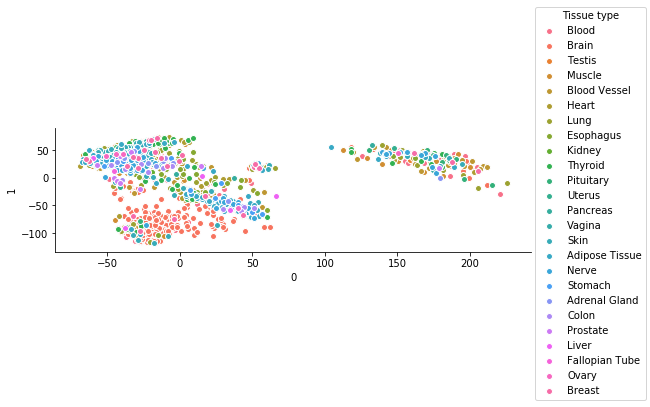

In [217]:
sns.pairplot(data=joined,hue='Tissue type',x_vars=[0],y_vars=[1],aspect=3)

## 2.Utilizando el algoritmo t-SNE

#### a. Realizar un scatter-plot en el plano 2D, utilizando colores para indicar el label.

In [221]:
tsne = TSNE(n_components=2, perplexity=3)
perplexity3 = tsne.fit_transform(gte)
dfperplexity3 = pd.DataFrame(perplexity3)


In [223]:
dfperplexity3.head(5)

,0,1
0,15.280499,-83.874756
1,-40.701378,-71.601616
2,35.079792,-74.225037
3,37.965206,-39.770523
4,17.313675,-77.598915


In [220]:
tsne = TSNE(n_components=2, perplexity=30)
perplexity30 = tsne.fit_transform(gte)
dfperplexity30 = pd.DataFrame(perplexity30)
dfperplexity30.head(5)

,0,1
0,13.906081,-52.708614
1,-12.025743,-68.344559
2,9.582717,-49.231075
3,6.610353,-36.912891
4,15.827929,-52.743938


In [219]:
tsne = TSNE(n_components=2, perplexity=1000)
perplexity1000 = tsne.fit_transform(gte)
dfperplexity1000 = pd.DataFrame(perplexity1000)
dfperplexity1000.head(10)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


,0,1
0,-6.137990,-2.326804
1,-6.837831,-1.801367
2,-5.986933,-2.335642
3,-5.763766,-2.048143
4,-6.247196,-2.383039
5,-5.521876,-2.218579
6,-5.882896,-2.009136
7,-6.074672,-2.174921
8,-5.561521,-2.183240
9,-5.340510,-2.065728


In [227]:
#Agrego la columna de labels para luego plotear
dfperplexity3['Tissue type'] = sampleLabels['Tissue type']
dfperplexity30['Tissue type'] = sampleLabels['Tissue type']
dfperplexity1000['Tissue type'] = sampleLabels['Tissue type']

Text(0.5,1,'TSNE con Perplexity 3')

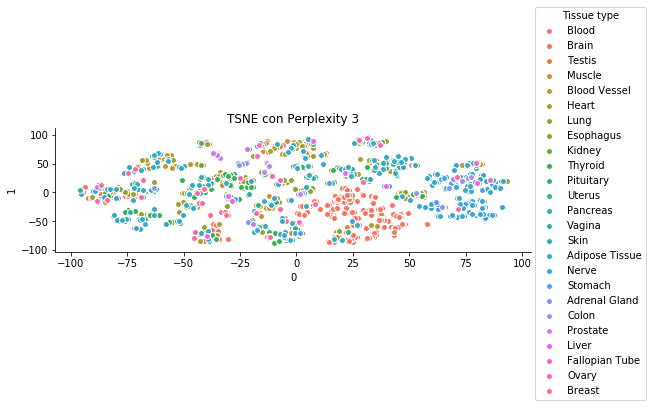

In [229]:
g = sns.pairplot(x_vars=[0],y_vars=[1], data=dfperplexity3, hue='Tissue type',aspect=3 )
plt.title('TSNE con Perplexity 3')

Text(0.5,1,'TSNE con Perplexity 30')

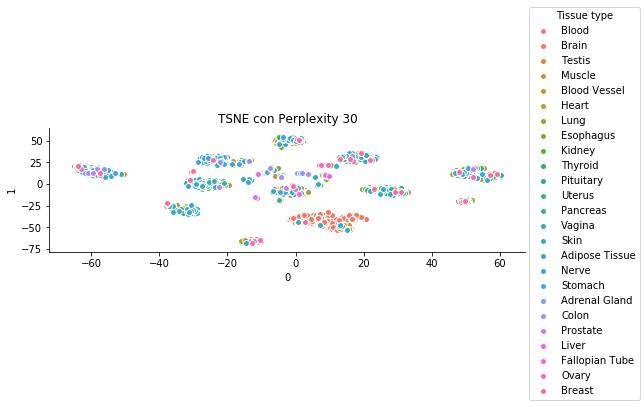

In [230]:
g = sns.pairplot(x_vars=[0],y_vars=[1], data=dfperplexity30, hue='Tissue type',aspect=3 )
plt.title('TSNE con Perplexity 30')

Text(0.5,1,'TSNE con Perplexity 1000')

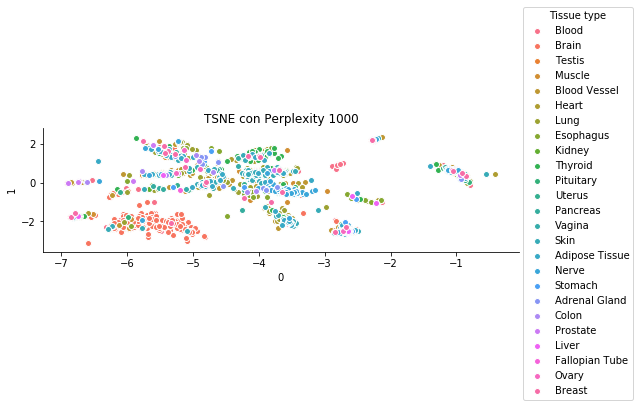

In [231]:
g = sns.pairplot(x_vars=[0],y_vars=[1], data=dfperplexity1000, hue='Tissue type',aspect=3 )
plt.title('TSNE con Perplexity 1000')

En el grafico de perplexity 3 se ve que todo muy disperso, al aumentarlo a 30 se puede apreciar que se forman como pequeñas comunidades de elementos que tienden a ser parecidos, al aumentar demasiado el valor perplexity pareciera que se vuelve a dispersar un poco mas, supongo que tiene que ver con que el valor se podria asemejar a un ratio y agrandarlo mucho no es ideal para formar los grupos.